# Imports

In [1]:
import numpy as np
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_db9c20835333490bade3b19a94d89312 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_db9c20835333490bade3b19a94d89312.get_object(Bucket='le-donotdelete-pr-cdfbjm5wffozxu',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

le = pd.read_csv(body)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# DataFrame "le"

In [3]:
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
le.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Heatmap showing NULL values

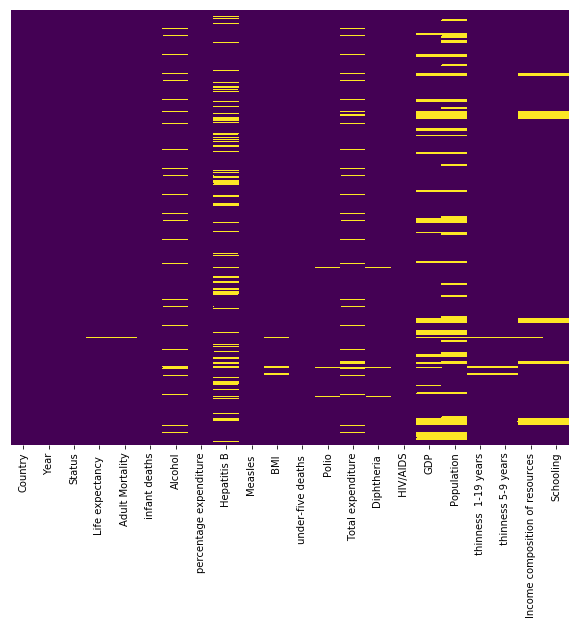

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(le.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Number of unique values for Country and Years

In [7]:
Countries=le['Country'].unique()
no_of_coun = le['Country'].nunique()
no_of_years = le['Year'].nunique()
print(no_of_coun)
print(no_of_years)

193
16


# Imputation:
Replacing the null values with mean of the data of different years for same country, if available. Otherwise replacing null with mean of global data for the value.

In [8]:
column=['Country','Year','Life expectancy ', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
        'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
        'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
        ' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling',]

In [9]:
le.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
for col in column[1:]:
    le[col].fillna(value=le[col].mean(),inplace=True)
le.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Life Expectancy Distribution plot

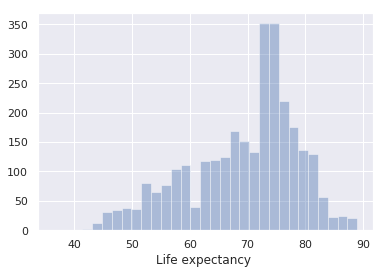

In [11]:
sns.set()
sns.distplot(le['Life expectancy '],kde=False)

Heatmap representing le after null values and unnecessary data removed

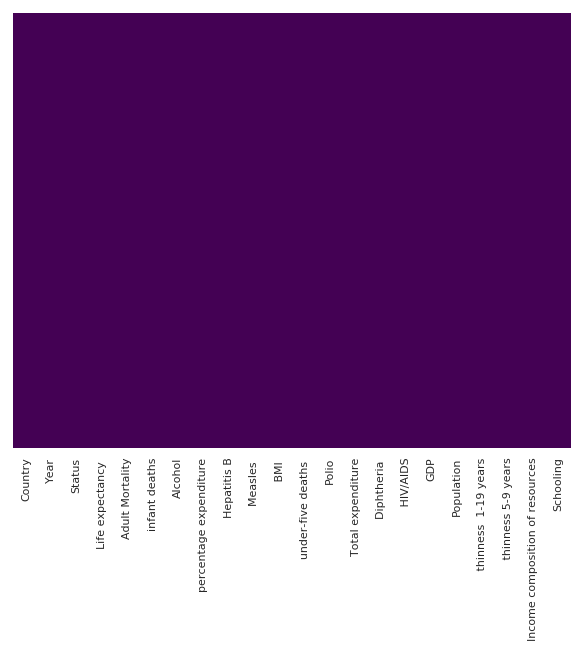

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(le.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Correlation heatmap

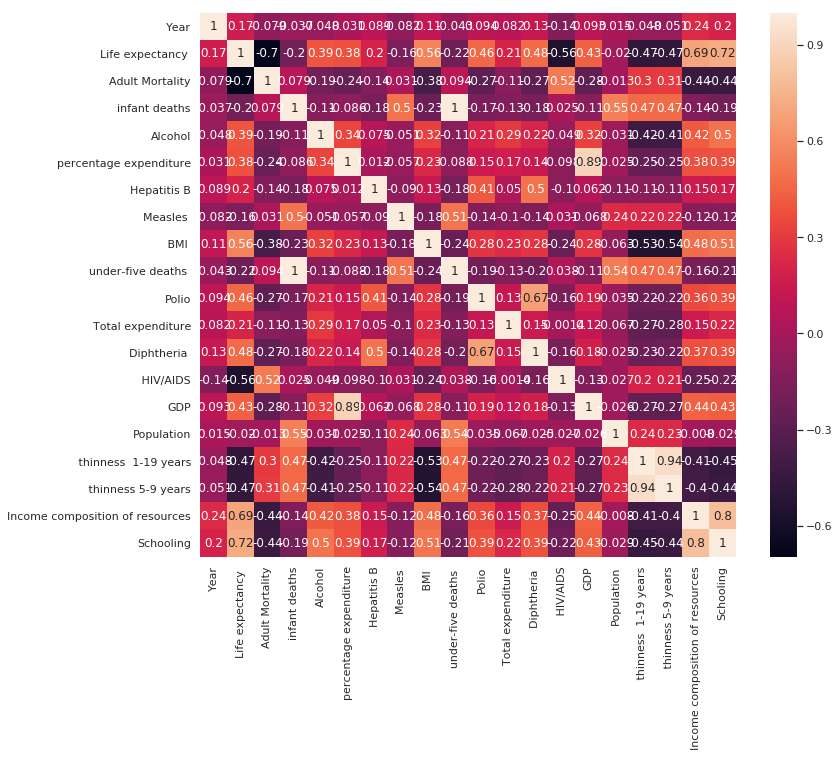

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(le.corr(),annot=True)

# Splitting Data and Training Model 

In [14]:
X=le[['Country','Status','Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]
y=le['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
numeric_feat=['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
categorical_feat=['Country','Status']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
categorical_transformer=Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
numerical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(transformers=[
    ('cat',categorical_transformer,categorical_feat),
    ('num',numerical_transformer,numeric_feat)
])
model=Pipeline([
    ('preprocessor',preprocessor),
    ('RFRegressor',LinearRegression())
])

In [18]:
model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>...gressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

# Prediction and Error Calculation

In [19]:
predm=model.predict(X_test)

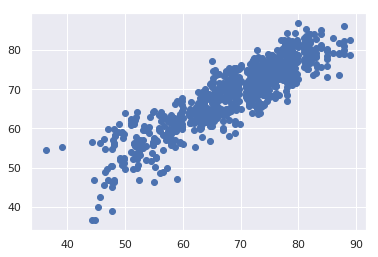

In [20]:
plt.scatter(y_test,predm)

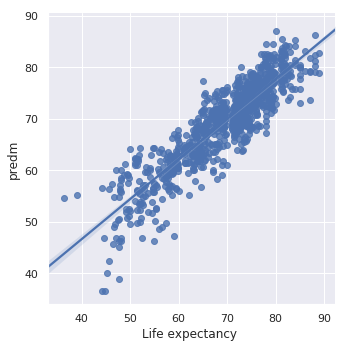

In [21]:
sns.lmplot('Life expectancy ','predm',data=pd.DataFrame(predm,y_test,columns=['predm']).reset_index())

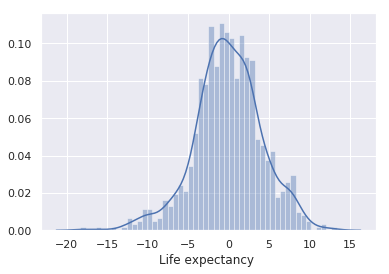

In [22]:
sns.distplot((y_test-predm),bins=50)

In [23]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predm))
print('MSE:',metrics.mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predm)))

MAE: 3.205027483377878
MSE: 17.45972465686501
RMSE: 4.178483535550309


In [24]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,predm)*100
r2_score

79.97096270289504

In [25]:
!pip install watson-machine-learning-client

In [26]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-11 01:11:28,255 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [27]:
wml_credentials={
  "apikey": "",
  "instance_id": "",
  "url": ""
}

In [28]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [31]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "", 
               client.repository.ModelMetaNames.NAME: "Life Expectancy"}

In [32]:
model_artifact =client.repository.store_model(model, meta_props=model_props)

In [33]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [34]:
published_model_uid

'4c2f182a-80a3-43b0-94b0-9cbc18417225'

In [35]:
deployment = client.deployments.create(published_model_uid, name="Life Expectancy")



#######################################################################################

Synchronous deployment creation for uid: '4c2f182a-80a3-43b0-94b0-9cbc18417225' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='43c66159-1739-40aa-bab1-ee0831ab1ddc'
------------------------------------------------------------------------------------------------




In [36]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [37]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/90ef8f05-77bc-4a81-84a7-1fb6f749b79d/deployments/43c66159-1739-40aa-bab1-ee0831ab1ddc/online'